In [194]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

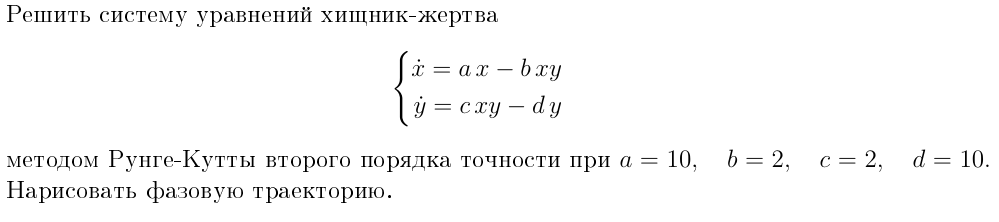

In [195]:
Image('task 7.png')

In [196]:
a = 10
b = 2
c = 2
d = 10

dx = lambda x, y: a*x - b*x*y
dy = lambda x, y: c*x*y - d*y

f = lambda x, y: np.array([dx(x, y), dy(x, y)])   # 2x2 equation system

In [197]:
def RK2(r0, step, count, coef=3./4):
    r = [r0]

    for i in range(count+1):
        k1 = r[i] + step * f(r[i][0], r[i][1]) / (2 * coef)
        r.append(r[i] + step * ((1 - coef) * f(r[i][0], r[i][1]) + coef * f(k1[0], k1[1])))
    r = np.array(r).transpose()
    return r

In [198]:
def runge_kutta_2_order(r0, step, count, coef=3./4):
    r = [r0]
    for i in range(count + 1):
        k1 = r[i] + step * f(r[i][0], r[i][1]) / (2 * coef)
        r.append(r[i] + step * ((1 - coef) * f(r[i][0], r[i][1]) + coef * f(k1[0], k1[1])))

    r = np.array(r).transpose()
    return r

In [199]:
x_0 = 1
y_0 = 1
t_0 = 0

t_from = 0
t_to = 5

N = 1000
h = (t_to-t_from)/N

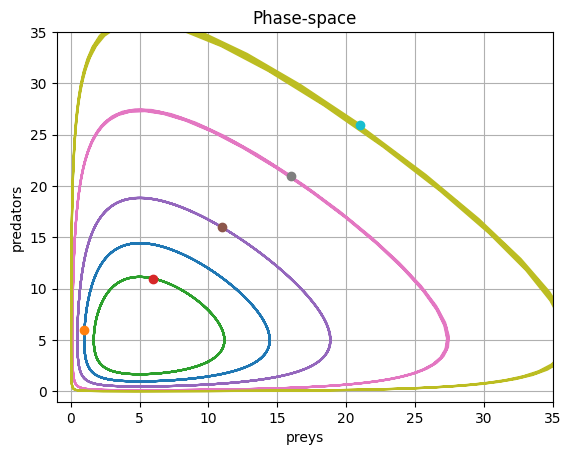

In [200]:
r_from = 1
r_to = 25
r_step = 5


R = [[i, i+5] for i in range(r_from, r_to, r_step)]

for r0 in R:
    x, y = RK2(r0, h, N)
    plt.plot(x, y, '-')
    plt.plot(r0[0], r0[1], 'o')

plt.grid()
plt.xlim([r_from-2, r_to+10])
plt.ylim([r_from-2, r_to+10])
plt.xlabel('preys')
plt.ylabel('predators')
plt.title('Phase-space')
plt.show()

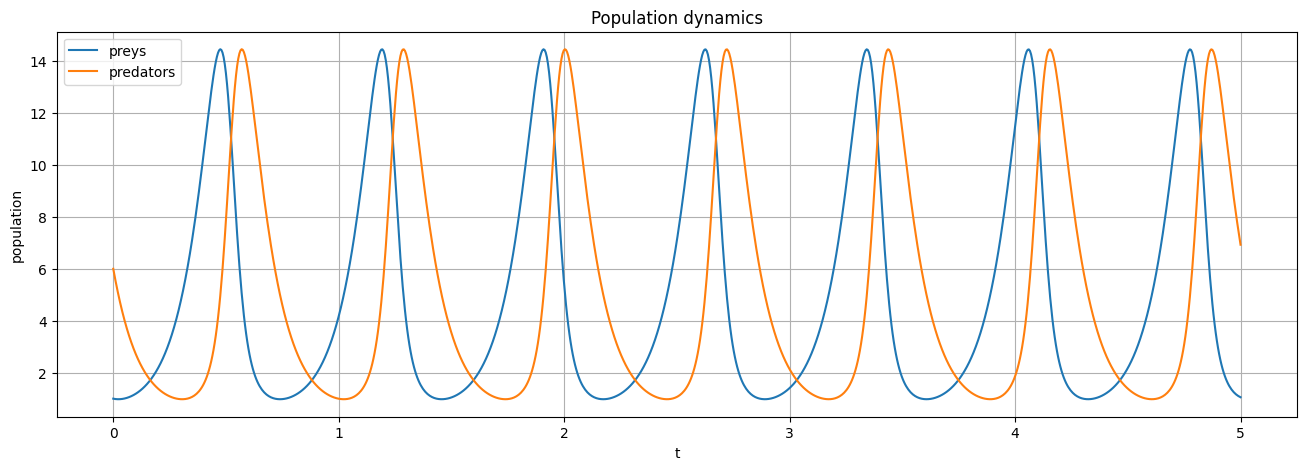

In [202]:
plt.figure(figsize=(16, 5))

t = np.linspace(t_from, t_to, N+2)
x, y = RK2(R[0], h, N)

plt.plot(t, x, label='preys')
plt.plot(t, y, label='predators')

plt.legend(loc=0)
plt.grid()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Population dynamics')
plt.show()